## Seeds

Выборка содержит информацию о зернах пшеницы, относящихся к трем разным сортам: Kama, Rosa и Canadian, по 70 штук, выбранных случайным образом.
Для построения данных были измерены семь параметров зёрен пшеницы:
1. Площадь A
2. Периметр P
3. Компактность C = 4 * pi * A / P ^ 2
4. Длина ядра
5. Ширина ядра
6. Коэффициент асимметрии
7. Длина канавки.

Последний столбец содержит номер сорта пшеницы.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

_Считывание данных_

In [2]:
url = 'https://raw.githubusercontent.com/ValManP/MachineLearningCourse/master/source/seeds_dataset.txt'
data = pd.read_csv(url, sep = ', ', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Assymetry coeff,Length of groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


_Отображение данных стандартными средствами python_

In [5]:
print(data)

      Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
5    14.38      14.21       0.8951             5.386            3.312   
6    14.69      14.49       0.8799             5.563            3.259   
7    14.11      14.10       0.8911             5.420            3.302   
8    16.63      15.46       0.8747             6.053            3.465   
9    16.44      15.25       0.8880             5.884            3.505   
10   15.26      14.85       0.8696             5.714            3.242   
11   14.03      14.16       0.8796             5.438            3.201   
12   13.89      14.02       0.8880             5.43

_Присвоим столбцам удобные алиасы_

In [6]:
data.columns = [u'area', u'perimeter', u'compactness', u'length', u'width',
       u'assymetry', u'lengthGroove', u'variety']

_Режимы отображения_

In [7]:
data.head()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
data.tail()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


- `area` - Площадь A
- `perimeter` - Периметр P
- `compactness` - Компактность C = 4 * pi * A / P ^ 2
- `length` - Длина ядра
- `width` - Ширина ядра
- `assymetry` - Коэффициент асимметрии
- `lengthGroove` - Длина канавки.

_Вывод размера данных и списка столбцов_

In [9]:
print(data.shape)
print(data.columns)

(210, 8)
Index(['area', 'perimeter', 'compactness', 'length', 'width', 'assymetry',
       'lengthGroove', 'variety'],
      dtype='object')


In [10]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            200, 201, 202, 203, 204, 205, 206, 207, 208, 209],
           dtype='int64', length=210)

_Способы обращения к данным_

In [11]:
data.at[2, 'perimeter']

14.09

In [12]:
data['perimeter']

0      14.84
1      14.57
2      14.09
3      13.94
4      14.99
5      14.21
6      14.49
7      14.10
8      15.46
9      15.25
10     14.85
11     14.16
12     14.02
13     14.06
14     14.05
15     14.28
16     13.83
17     14.75
18     14.21
19     13.57
20     14.40
21     14.26
22     14.90
23     13.23
24     14.76
25     15.16
26     13.76
27     13.67
28     14.18
29     14.02
       ...  
180    12.95
181    13.41
182    13.36
183    13.07
184    13.77
185    13.31
186    13.45
187    12.80
188    12.82
189    12.41
190    12.80
191    12.86
192    13.02
193    12.83
194    13.27
195    13.47
196    13.53
197    13.78
198    13.67
199    13.38
200    13.44
201    13.32
202    12.72
203    13.41
204    13.47
205    13.20
206    12.88
207    13.66
208    13.21
209    13.34
Name: perimeter, Length: 210, dtype: float64

In [13]:
data['perimeter'][3]

13.94

In [14]:
data['width'].dtype.name

'float64'

In [15]:
type(data['length'][3])

numpy.float64

In [16]:
type(data['length'])

pandas.core.series.Series

In [17]:
data[['area', 'length']].head()

,area,length
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


_Основные характеристики выборки по каждому из параметров._

In [18]:
data.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


_Матрица ковариаций_

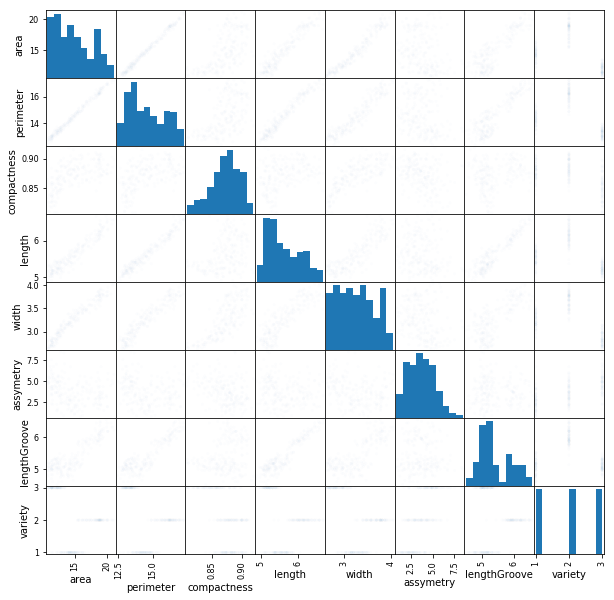

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

_Корреляция параметров_

In [20]:
data.corr()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
assymetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
variety,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


_Отрисовка графика для параметров area и length_

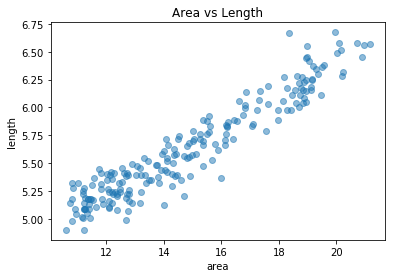

In [21]:
plt.plot(data['area'], data['length'], 'o', alpha = 0.5)
plt.xlabel('area')
plt.ylabel('length')
plt.title('Area vs Length')
pass

_Проверка выполнения условия в столбце_

In [22]:
data['variety'] == 1

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196    False
197    False
198    False
199    False
200    False
201    False
202    False
203    False
204    False
205    False
206    False
207    False
208    False
209    False
Name: variety, Length: 210, dtype: bool

_Диаграмма рассеяния переменных "площадь зерна" "длина зерна" для 2 и 3 сортов. Заметим, что 2ой сорт превышает размеры 3его_

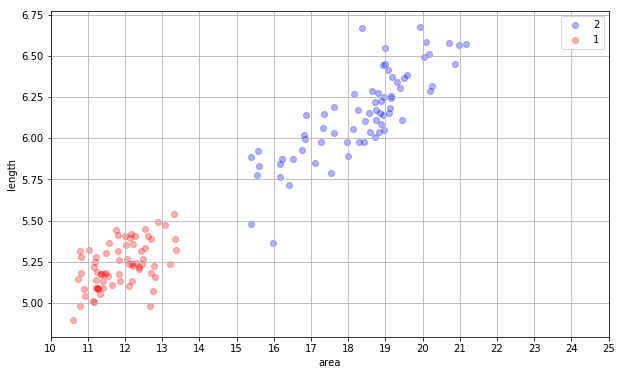

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['variety'] == 2]['area'],
            data[data['variety'] == 2]['length'],
            alpha = 0.3,
            label = '2',
            color = 'b')

plt.scatter(data[data['variety'] == 3]['area'],
            data[data['variety'] == 3]['length'],
            alpha = 0.3,
            label = '1',
            color = 'r')

plt.xlabel('area')
plt.xticks(range(10, 26))
plt.xlim(10, 25)
plt.ylabel('length')
plt.legend()
plt.grid()

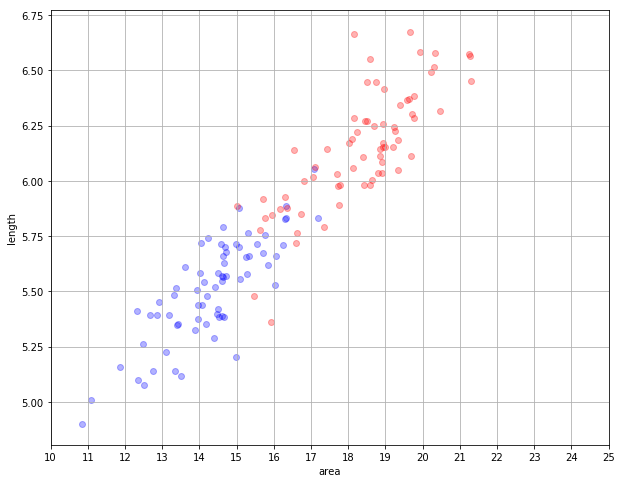

In [24]:
np.random.seed(0)
area_rnd = data['area'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(area_rnd[data['variety'] == 1],
            data[data['variety'] == 1]['length'],
            alpha = 0.3,
            label = '1',
            color = 'b')

plt.scatter(area_rnd[data['variety'] == 2],
            data[data['variety'] == 2]['length'],
            alpha = 0.3,
            label = '2',
            color = 'r')

plt.xlabel('area')
plt.xticks(range(10, 26))
plt.xlim(10, 25)
plt.ylabel('length')
plt.title('')
plt.grid()

_График площади и периметра для 1 и 2 групп. Заметим, что размеры зерен второй группы больше размеров первой_

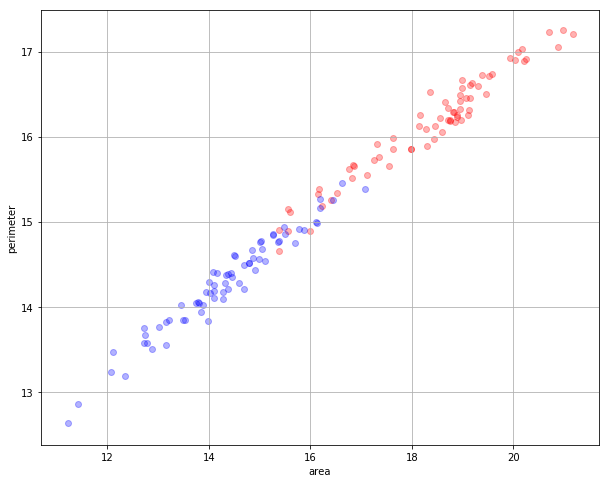

In [25]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['variety'] == 2]['area'],
            data[data['variety'] == 2]['perimeter'],
            alpha = 0.3,
            label = '2',
            color = 'r')

plt.scatter(data[data['variety'] == 1]['area'],
            data[data['variety'] == 1]['perimeter'],
            alpha = 0.3,
            label = '1',
            color = 'b')

plt.xlabel('area')
plt.ylabel('perimeter')
plt.grid()

_Параметры стоблцов с типом float_

In [26]:
data.describe(include = ['float'])

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


_Параметры столбцов с любым типом_

In [27]:
data.describe(include = 'all')

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


_Уникальные значения в столбце_

In [28]:
data['variety'].unique()

array([1, 2, 3], dtype=int64)

In [29]:
data['length'].unique()

array([ 5.763,  5.554,  5.291,  5.324,  5.658,  5.386,  5.563,  5.42 ,
        6.053,  5.884,  5.714,  5.438,  5.439,  5.479,  5.482,  5.351,
        5.119,  5.527,  5.205,  5.226,  5.52 ,  5.618,  5.099,  5.789,
        5.833,  5.395,  5.541,  5.516,  5.454,  5.757,  5.717,  5.585,
        5.712,  5.709,  5.826,  5.832,  5.656,  5.397,  5.348,  5.138,
        5.877,  5.579,  5.376,  5.701,  5.57 ,  5.545,  5.678,  5.674,
        5.715,  5.504,  5.741,  5.702,  5.388,  5.384,  5.662,  5.159,
        5.008,  4.902,  5.076,  5.262,  5.139,  5.63 ,  5.609,  5.569,
        5.412,  6.191,  5.998,  5.978,  6.154,  6.017,  5.927,  6.064,
        6.579,  6.445,  5.85 ,  5.875,  6.006,  6.285,  6.384,  6.366,
        6.173,  6.084,  6.549,  6.573,  6.45 ,  6.581,  6.172,  6.272,
        6.037,  6.666,  6.139,  6.341,  6.449,  6.271,  6.219,  5.718,
        5.89 ,  6.113,  6.369,  6.248,  6.152,  6.033,  6.675,  6.153,
        6.107,  6.303,  6.183,  6.259,  6.563,  6.416,  6.051,  6.245,
      

_Длина первого зерна в каждой группе_

In [30]:
for name in data['variety'].unique():
    print(name, data['length'][data['variety'] == name].iloc[0])

1 5.763
2 6.191
3 5.472


In [31]:
data['assymetry'].unique()

array([ 2.221 ,  1.018 ,  2.699 ,  2.259 ,  1.355 ,  2.462 ,  3.586 ,
        2.7   ,  2.04  ,  1.969 ,  4.543 ,  1.717 ,  3.986 ,  3.136 ,
        2.932 ,  4.185 ,  5.234 ,  1.599 ,  1.767 ,  4.102 ,  3.072 ,
        2.688 ,  0.7651,  1.415 ,  1.791 ,  0.903 ,  3.373 ,  2.504 ,
        2.754 ,  3.531 ,  0.8551,  3.412 ,  3.92  ,  2.124 ,  2.129 ,
        2.27  ,  2.823 ,  2.956 ,  3.112 ,  6.685 ,  2.587 ,  2.249 ,
        2.461 ,  4.711 ,  3.128 ,  1.56  ,  1.367 ,  2.958 ,  2.704 ,
        3.975 ,  5.593 ,  4.116 ,  3.328 ,  1.481 ,  1.933 ,  2.802 ,
        1.142 ,  1.999 ,  1.502 ,  2.269 ,  3.22  ,  4.157 ,  1.176 ,
        2.352 ,  1.313 ,  2.217 ,  1.464 ,  3.533 ,  4.076 ,  4.675 ,
        4.539 ,  2.936 ,  4.004 ,  4.92  ,  3.824 ,  4.451 ,  5.064 ,
        2.858 ,  5.532 ,  5.324 ,  5.173 ,  1.472 ,  2.962 ,  2.443 ,
        1.649 ,  3.691 ,  5.78  ,  5.016 ,  1.955 ,  3.12  ,  3.237 ,
        6.001 ,  4.933 ,  3.696 ,  3.477 ,  2.144 ,  2.853 ,  2.188 ,
        4.217 ,  2.0

## Задача

Удалим периметр, т.к. он может быть посчитан через длину и ширину

In [32]:
data.drop(['perimeter'], axis = 1)

,area,compactness,length,width,assymetry,lengthGroove,variety
0,15.26,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,0.8880,5.884,3.505,1.9690,5.533,1


# Готовим данные

In [33]:
data['perimeter'].dtype.name

'float64'

In [34]:
data['variety'].dtype.name

'int64'

In [35]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
numerical_columns   = [c for c in data.columns if data[c].dtype.name == 'float64']
print(categorical_columns)
print(numerical_columns)

['variety']
['area', 'perimeter', 'compactness', 'length', 'width', 'assymetry', 'lengthGroove']


In [36]:
for c in numerical_columns:
    print(c, data[c].unique())

area [ 15.26  14.88  14.29  13.84  16.14  14.38  14.69  14.11  16.63  16.44
  14.03  13.89  13.78  13.74  14.59  13.99  15.69  14.7   12.72  14.16
  15.88  12.08  15.01  16.19  13.02  12.74  13.45  13.16  15.49  14.09
  13.94  15.05  16.12  16.2   17.08  14.8   14.28  13.54  13.5   15.5
  15.11  13.8   15.36  14.99  14.79  14.86  14.43  15.78  14.49  14.33
  14.52  15.03  14.46  14.92  15.38  12.11  11.42  11.23  12.36  13.22
  12.78  12.88  14.34  14.01  14.37  12.73  17.63  16.84  17.26  19.11
  16.82  16.77  17.32  20.71  18.94  17.12  16.53  18.72  20.2   19.57
  19.51  18.27  18.88  18.98  21.18  20.88  20.1   18.76  18.81  18.59
  18.36  16.87  19.31  18.17  16.41  17.99  19.46  19.18  18.95  18.83
  18.85  19.94  18.55  18.45  19.38  19.13  19.14  20.97  19.06  18.96
  19.15  18.89  20.03  20.24  18.14  16.17  18.43  15.99  18.75  18.65
  17.98  20.16  17.55  18.3   16.16  15.56  17.36  15.57  15.6   16.23
  13.07  13.32  13.34  12.22  11.82  11.21  11.43  12.49  12.7   10.79
  

## Обрабатываем пропущенные значения

Удаление строк или столбцов с пропущенными значениями может существенно уменьшить размер данных, поэтому предпочтительнее заполнить их средним или медианным значениями.

In [37]:
data.median(axis = 0)

area            14.35500
perimeter       14.32000
compactness      0.87345
length           5.52350
width            3.23700
assymetry        3.59900
lengthGroove     5.22300
variety          2.00000
dtype: float64

In [38]:
data = data.fillna(data.median(axis = 0), axis = 0)

_Нет пропущенных данных_

In [39]:
data[numerical_columns].count(axis = 0)

area            210
perimeter       210
compactness     210
length          210
width           210
assymetry       210
lengthGroove    210
dtype: int64

In [40]:
data[categorical_columns].count(axis = 0)

variety    210
dtype: int64

_Хар-ки столбца_

In [41]:
data['variety'].describe()

count    210.000000
mean       2.000000
std        0.818448
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: variety, dtype: float64

In [42]:
type(data['variety'].describe())

pandas.core.series.Series

_Заполняем пропущенные значения в столбце_

In [43]:
data['variety'] = data['variety'].fillna(4)

In [44]:
data.describe(include = [float])

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [45]:
data_describe = data.describe(include = [float])
for c in numerical_columns:
    data[c] = data[c].fillna(data_describe[c]['max'])

In [46]:
data.describe(include = [float])

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


## Векторизация

Применим векторизацию к категориальному признаку: Сорт пшеницы

In [47]:
nonbinary_columns = categorical_columns
print(nonbinary_columns)

['variety']


In [48]:
data['variety'].unique()

array([1, 2, 3], dtype=int64)

In [49]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['variety'], dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. В этом случае количественные признаки полезно _нормализовать_.

In [50]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [51]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

_Нормализация значений_

In [52]:
data_numerical.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-2.254281e-15,-2.566730e-15,1.402780e-15,-4.132144e-15,-2.622241e-16,3.827626e-16,-1.691768e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.463218e+00,-1.645753e+00,-2.661876e+00,-1.646566e+00,-1.664233e+00,-1.952105e+00,-1.808966e+00
25%,-8.858385e-01,-8.494033e-01,-5.966534e-01,-8.267062e-01,-8.329169e-01,-7.573380e-01,-7.387301e-01
50%,-1.692697e-01,-1.832261e-01,1.037448e-01,-2.370616e-01,-5.719866e-02,-6.730769e-02,-3.765590e-01
75%,8.445808e-01,8.849547e-01,7.099807e-01,7.927006e-01,8.025778e-01,7.106807e-01,9.541143e-01
max,2.176333e+00,2.060336e+00,2.001803e+00,2.361889e+00,2.050213e+00,3.163032e+00,2.323446e+00


# Соединяем в одну таблицу

In [53]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
data.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.000000
mean,-2.254281e-15,-2.566730e-15,1.402780e-15,-4.132144e-15,-2.622241e-16,3.827626e-16,-1.691768e-16,2.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.818448
min,-1.463218e+00,-1.645753e+00,-2.661876e+00,-1.646566e+00,-1.664233e+00,-1.952105e+00,-1.808966e+00,1.000000
25%,-8.858385e-01,-8.494033e-01,-5.966534e-01,-8.267062e-01,-8.329169e-01,-7.573380e-01,-7.387301e-01,1.000000
50%,-1.692697e-01,-1.832261e-01,1.037448e-01,-2.370616e-01,-5.719866e-02,-6.730769e-02,-3.765590e-01,2.000000
75%,8.445808e-01,8.849547e-01,7.099807e-01,7.927006e-01,8.025778e-01,7.106807e-01,9.541143e-01,3.000000
max,2.176333e+00,2.060336e+00,2.001803e+00,2.361889e+00,2.050213e+00,3.163032e+00,2.323446e+00,3.000000


# X и y

In [54]:
X = data.drop(('variety'), axis = 1) # выбрасываем столбец 'variety'
y = data['variety']
feature_names = X.columns


In [55]:
type(feature_names)

pandas.core.indexes.base.Index

In [56]:
feature_names

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'assymetry',
       'lengthGroove'],
      dtype='object')

In [57]:
print(X.shape)
print(y.shape)
N, d = X.shape

(210, 7)
(210,)


In [58]:
type(X)

pandas.core.frame.DataFrame

In [59]:
type(y)

pandas.core.series.Series

_Получаем обучающие и тестовые выборки (их размеры в пропорции 70% и 30%)_

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

147 63


# $k$NN
Будем предсказывать сорт пшеницы. Объявляем классификатор с параметром $k$ = 10. Проводим обучение модели на обучающей выборке X_train, y_train

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [62]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

_Применяем метод predict. Считаем среднюю ошибку_

In [63]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0544217687075 0.111111111111


_Можно посчитать ошибку как 1 - точность, вычисленную через метод score в knn_

In [64]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [65]:
err_test

0.11111111111111116

_С помощью метода confusion matrix можно вычислить точность работы классификатора. Элемент матрицы (i, j) равен числу объектов из группы i, а предсказанных в группу j_

In [66]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]


### Подбор параметров

_Подберем оптимальное(по величине ошибки) значение параметра $k$. В данной выборке получаем $k$=15 с ошибкой ~0.05_

In [67]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.047619047619 15


_Проведем классификацию и посчитаем ошибки при данном параметре $k$_

In [68]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0612244897959 0.111111111111


## Нейронные сети
Проведем задачу классификации зерен пшеницы по трем сортам с помощью нейронных сетей

_Разобъем данные на тестовую и обучающую выборки_

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

_Обучаем классификатор вида многослойного персептрона. Активационная функций: логистическая сигмоидальная f(x) = 1 / (1 + exp(-x)). Один скрытый слой с 10-ю нейронами_

In [70]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

_Предсказываем сорт пшеницы и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [71]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.00714285714286 0.0


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.02_

_Попробуем использовать персептрон с двумя скрытыми слоями по 10 нейронов в каждом_

In [72]:
mlp_model = MLPClassifier(hidden_layer_sizes = (10, 10), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

_Проверям качество получившегося классификатора по величине ошибки на тестовой и обучающей выборках_

In [73]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0285714285714 0.0


_Ошибка на тестовой выборке равна 0, значит будем использовать сеть с двумя скрытыми слоями_

### Подбор параметра alpha и числа нейронов
Подберем _оптимальное_ значение параметра регуляризации `alpha`

In [85]:
alpha_arr = np.logspace(-1, 0.5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10, 10), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

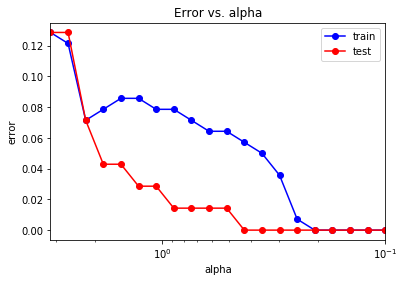

In [86]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [76]:
print(alpha_arr)

[ 0.1         0.11993539  0.14384499  0.17252105  0.20691381  0.24816289
  0.29763514  0.35696988  0.42813324  0.51348329  0.61584821  0.73861998
  0.88586679  1.06246783  1.27427499  1.52830673  1.83298071  2.19839265
  2.6366509   3.16227766]


_При alpha от 2.2 до 0.24 наблюдаем переобучение. Параметр регуляризации должен быть достаточно малым (<0.2)_

_Минимальное значение ошибки_

In [77]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


_Оптимальное значение alpha_

In [78]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.1


### Найдем оптимальное количество нейронов
Используем в качестве alpha значение значение по умолчанию (0.0001). Количество скрытых слоев = 2.

In [79]:
neurons_arr = np.arange(2, 10, 1)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons, neurons), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

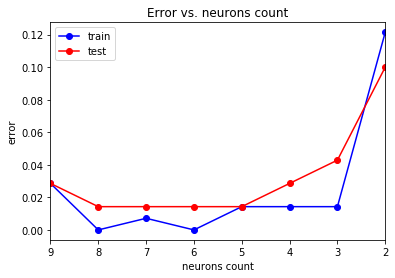

In [83]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'train')
plt.plot(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

_Видно, что 6 и 8 нейронов в скрытых слоях являются оптимальным (по величине ошибки) количеством. При 2 нейронах наблюдается несильное переобучение_

_Минимальное значение ошибки_

In [81]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0142857142857


_Оптимальное число нейронов_

In [82]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)
neurons_opt = neurons_opt[0]

[5 6 7 8]


## Random Forest
Проведем классификацию зёрен пшеницы по трем сортам с помощью случайного леса.

_Разобъем данные на тестовую и обучающую выборки_

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

_Обучаем классификатор вида случайного леса. Число деревьев = 100_

In [92]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

_Предсказываем сорт пшеницы и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [93]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0428571428571


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.04_

_Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев_

In [122]:
trees_arr = np.arange(15, 100, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)

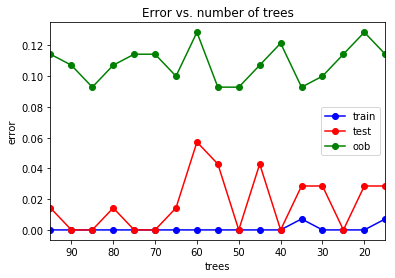

In [123]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [107]:
print(trees_arr)

[15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


_При количестве деревьев в лесу равном 40-45 наблюдаем переобучение. Также видно, что для уменьшения oob-ошибки количество деревьев не должно быть малым (<40). При числе деревьев равному 50 имеется минимум oob-ошибки, ошибки на тестовой и обучающей совпадают и равны нулю._

_Минимальное значение ошибки_

In [108]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


_Оптимальное количество деревьев_

In [109]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

50


## Extremely Randomized Trees
Проведем классификацию зёрен пшеницы по трем сортам с помощью Extremely Randomized Trees классификатора.

_Разобъем данные на тестовую и обучающую выборки_

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

_Обучаем классификатор вида Extremely Randomized Trees. Число деревьев = 100_

In [111]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

_Предсказываем сорт пшеницы и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [112]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.0285714285714


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.02_

_Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев. Указываем bootstrap=True для генерации случайной bootstrap-выборки из обучащей_

In [124]:
trees_arr = np.arange(15, 100, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = trees, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

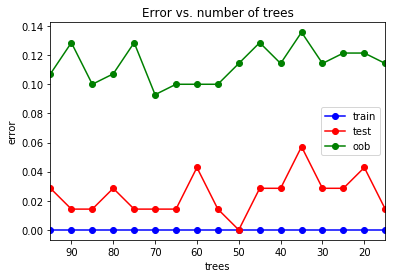

In [125]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [116]:
print(trees_arr)

[15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


_При малом количестве деревьев наблюдаем переобучение. Как и для Random Forest видим, что малое количество деревьев (<40) негативно влияет на величину oob-ошибки._

_Минимальное значение ошибки_

In [126]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


_Оптимальное количество деревьев_

In [127]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

50


## AdaBoost
Проведем классификацию зёрен пшеницы по трем сортам с помощью AdaBoost классификатора.

_Разобъем данные на тестовую и обучающую выборки_

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)

_Обучаем классификатор вида Ada Boost. Число классификаторов (по умолчанию DecisionTreeClassifier) = 100_

In [172]:
ab = ensemble.AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

_Предсказываем сорт пшеницы и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [173]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.0190476190476


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.02_

_Построим график зависимости ошибки на тестовой и обучающей выборках. Параметр learningrate уменьшает вклад каждого классификатора._

In [193]:
estim_arr = np.arange(15, 100, 5)
test_err = []
train_err = []
for estim in estim_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estim, learning_rate = 0.5)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

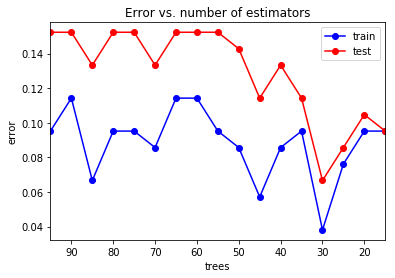

In [194]:
plt.plot(estim_arr, train_err, 'b-o', label = 'train')
plt.plot(estim_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(estim_arr), np.min(estim_arr)])
plt.title('Error vs. number of estimators')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [196]:
print(estim_arr)

[15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


_Наблюдаем достаточно низкую ошибку при количестве классификаторов <30. При большем количестве классификаторов имеется переобучение_

_Минимальное значение ошибки_

In [197]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0380952380952 0.0666666666667


_Оптимальное количество классификаторов_

In [198]:
estim_opt = estim_arr[test_err == min_test_err]
estim_opt = estim_opt[0]
print(estim_opt)

30


## GBT
Проведем классификацию зёрен пшеницы по трем сортам с помощью Gradient Boosted Trees классификатора.

_Разобъем данные на тестовую и обучающую выборки_

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)

_Обучаем классификатор вида Gradient Boosted Trees. Число деревьев = 100_

In [206]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

_Предсказываем сорт пшеницы и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [207]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.0190476190476


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.02_

_Построим график зависимости ошибки на тестовой и обучающей выборках. Параметр learningrate уменьшает вклад каждого дерева, по умолчанию равен 0.1_

In [215]:
trees_arr = np.arange(2, 20, 2)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))

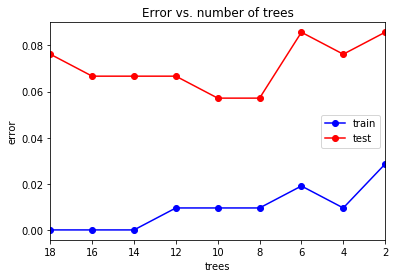

In [216]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [214]:
print(trees_arr)

[ 2  4  6  8 10 12 14 16 18]


_При количестве деревьев > 12 наблюдаем переобучение. При малом числе (>6) ошибка на тестовой выборке достигает локального максимума. Предпочтительным числом деревьев можно указать 8-12_

_Минимальное значение ошибки_

In [217]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0571428571429


_Оптимальное количество деревьев_

In [220]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

8
